In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import tensorflow as tf
import keras
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Dense
from keras import Input
from sklearn import metrics
import random

In [2]:

def get_data(file):
    f = open(file,"r")
    data=f.read()
    rows = data.split('\n')
    rows.remove('')
    X = []
    for row in rows:
        aux = row.split(' ')
        if '' in aux:
            aux.remove('')
        X.append(aux)
    return np.asarray(X, dtype='int64')

def normalize_labels(labels):
    for i in range(len(labels)):
        labels[i] = (labels[i]+1)/2
    return labels



def accuracy(pred, truth):
    count = 0
    for i in range(len(pred)):
        if pred[i] == 1 and truth[i]==1:
            count+=1
        if pred[i] == 0 and truth[i]==0:
            count+=1
            
    count_r = 0
    for i in range(len(pred)):
        if pred[i] == 1 and truth[i]==0:
            count_r+=1
        if pred[i] == 0 and truth[i]==1:
            count_r+=1
            
    return max(count,count_r)/len(pred)
    

def print_points(labels, points, n_points=1000):
    max_points = min(len(labels),n_points)
    tsne = TSNE(random_state=2)
    points = tsne.fit_transform(points)
    cluster0 = []
    cluster1 = []
    outliers = []
    for i in range(max_points):
        if labels[i] == 0:
            cluster0.append(points[i])
        if labels[i] == 1:
            cluster1.append(points[i])
        if labels[i] == -1:
            outliers.append(points[i])
            
    cluster0 = np.asarray(cluster0)
    cluster1 = np.asarray(cluster1)
    outliers = np.asarray(outliers)
    if cluster0.size>0:
        plt.scatter(cluster0[:,0],cluster0[:,1],color='orange')
    if cluster1.size>0:
        plt.scatter(cluster1[:,0],cluster1[:,1],color='purple')
    if outliers.size>0:
        plt.scatter(outliers[:,0],outliers[:,1],color='gray')
    plt.show()
    
def make_ones(vec):
    for i in range(len(vec)):
        if vec[i]==-1:
            vec[i]=1
    return vec

Train data point scatter


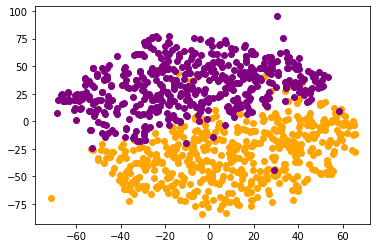

Validation data point scatter


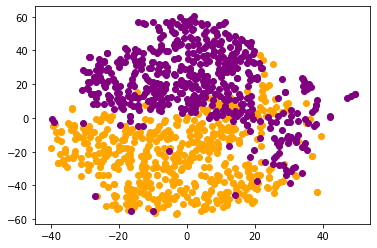

In [3]:
X_train = get_data('gisette_train.data')
X_valid = get_data('gisette_valid.data')
y_train = normalize_labels(get_data('gisette_train.labels').flatten())
y_valid = normalize_labels(get_data('gisette_valid.labels').flatten())

print('Train data point scatter')
print_points(y_train,X_train)

print('Validation data point scatter')
print_points(y_valid,X_valid)

Silhouette Coefficient: 0.000
Random chance accuracy  0.503
Random chance TSNE scatter


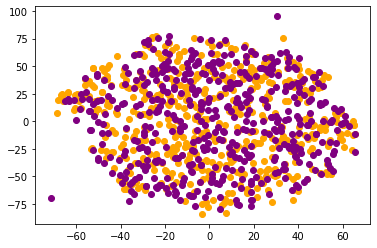

Silhouette Coefficient: -0.000
Random chance accuracy  0.52
Random chance TSNE scatter


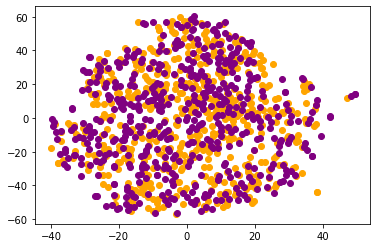

In [4]:
# random chance simulation and scatter
rand_chance1=[]
for i in range(6000):
    rand_chance1.append(random.randint(0,1))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, rand_chance1))
print("Random chance accuracy ",accuracy(rand_chance1, y_train))
print('Random chance TSNE scatter')
print_points(rand_chance1,X_train)


rand_chance2=[]
for i in range(1000):
    rand_chance2.append(random.randint(0,1))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid, rand_chance2))
print("Random chance accuracy ",accuracy(rand_chance2, y_valid))
print('Random chance TSNE scatter')
print_points(rand_chance2,X_valid)

In [5]:
input_df = Input( shape = (5000, ))
x = Dense(7, activation = 'relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(100, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(5000, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5000)]            0         
_________________________________________________________________
dense (Dense)                (None, 7)                 35007     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               200100    
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              202000

In [6]:
autoencoder.fit(X_train, X_train, batch_size= 120, epochs = 15, verbose = 0)
X_train_enc = encoder.predict(X_train)
autoencoder.fit(X_valid, X_valid, batch_size= 120, epochs = 15, verbose = 0)
X_valid_enc = encoder.predict(X_valid)

Train data point scatter


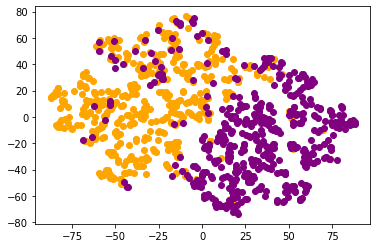

Validation data point scatter


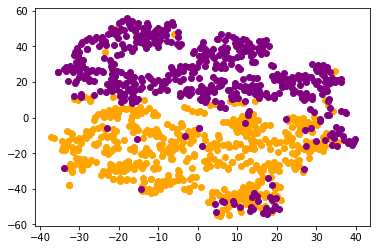

In [7]:
print('Train data point scatter')
print_points(y_train,X_train_enc)

print('Validation data point scatter')
print_points(y_valid,X_valid_enc)

Silhouette Coefficient: 0.053
Training accuracy  0.687
Train TSNE scatter


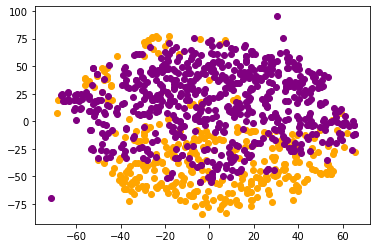

Silhouette Coefficient: 0.051
Valudation accuracy  0.679
Validation TSNE scatter


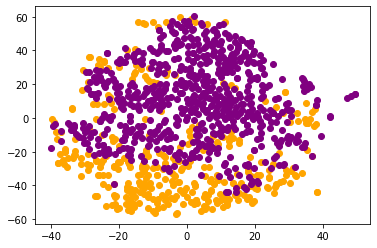

In [8]:
#KMeans 
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
predictionsKMeans = kmeans.predict(X_valid)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, kmeans.labels_))
print("Training accuracy ", accuracy(kmeans.labels_, y_train))
print('Train TSNE scatter')
print_points(kmeans.labels_,X_train)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid, predictionsKMeans))
print("Valudation accuracy ",accuracy(predictionsKMeans, y_valid))
print('Validation TSNE scatter')
print_points(predictionsKMeans, X_valid)


Silhouette Coefficient: 0.028
Training accuracy  0.5811666666666667
Train TSNE scatter


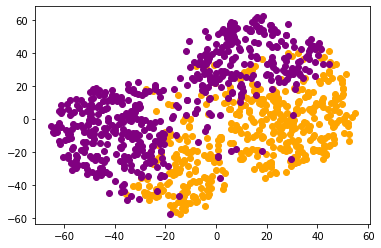

Silhouette Coefficient: 0.027
Valudation accuracy  0.564
Validation TSNE scatter


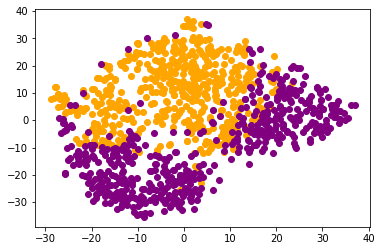

In [9]:
#KMeans + normalization
X_train_norm = normalize(X_train)
X_valid_norm = normalize(X_valid)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_norm)
predictionsKMeans = kmeans.predict(X_valid_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_norm, kmeans.labels_))
print("Training accuracy ", accuracy(kmeans.labels_, y_train))
print('Train TSNE scatter')
print_points(kmeans.labels_,X_train_norm)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_norm, predictionsKMeans))
print("Valudation accuracy ",accuracy(predictionsKMeans, y_valid))
print('Validation TSNE scatter')
print_points(predictionsKMeans, X_valid_norm)

Silhouette Coefficient: 0.315
Training accuracy  0.892
Train TSNE scatter


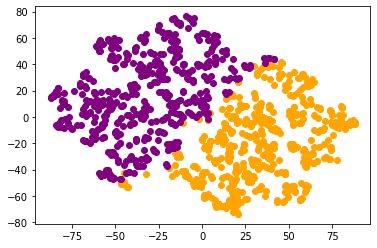

Silhouette Coefficient: 0.223
Valudation accuracy  0.879
Validation TSNE scatter


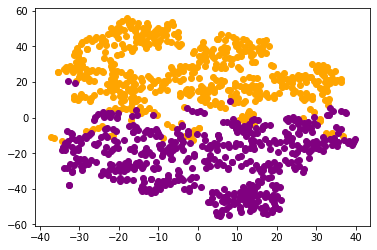

In [10]:
#KMeans + autoencoder
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_enc)
predictionsKMeans = kmeans.predict(X_valid_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc, kmeans.labels_))
print("Training accuracy ", accuracy(kmeans.labels_, y_train))
print('Train TSNE scatter')
print_points(kmeans.labels_,X_train_enc)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc, predictionsKMeans))
print("Valudation accuracy ",accuracy(predictionsKMeans, y_valid))
print('Validation TSNE scatter')
print_points(predictionsKMeans, X_valid_enc)


Silhouette Coefficient: 0.364
Training accuracy  0.8981666666666667
Train TSNE scatter


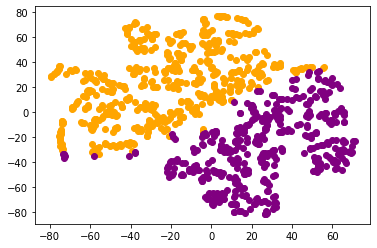

Silhouette Coefficient: 0.246
Valudation accuracy  0.884
Validation TSNE scatter


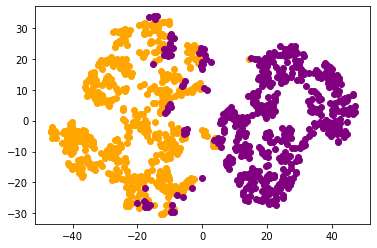

In [11]:
#KMeans + autoencoder + normalization
X_train_enc_norm = normalize(X_train_enc)
X_valid_enc_norm = normalize(X_valid_enc)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_enc_norm)
predictionsKMeans = kmeans.predict(X_valid_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc_norm, kmeans.labels_))
print("Training accuracy ", accuracy(kmeans.labels_, y_train))
print('Train TSNE scatter')
print_points(kmeans.labels_,X_train_enc_norm)


print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc_norm, predictionsKMeans))
print("Valudation accuracy ",accuracy(predictionsKMeans, y_valid))
print('Validation TSNE scatter')
print_points(predictionsKMeans, X_valid_enc_norm)

In [12]:
def DBSCAN_tune_ones(data,labels):

    maxi = [0,0,0]
    for j in range(1,30):
        vals = []
        for i in range(1,10000,1000):
            dbscan = DBSCAN(eps=i, min_samples=j)
            predic = dbscan.fit_predict(data)
            acc = accuracy(make_ones(predic), labels)
            vals.append(acc)
            if acc > maxi[0]:
                maxi[0] = acc
                maxi[1] = i
                maxi[2] = j
    plt.plot(vals)
    plt.show()
    return maxi

def DBSCAN_tune(data,labels):

    maxi = [0,0,0]
    for j in range(1,30):
        vals = []
        for i in range(1,10000,1000):
            dbscan = DBSCAN(eps=i, min_samples=j)
            predic = dbscan.fit_predict(data)
            acc = accuracy(predic, labels)
            vals.append(acc)
            if acc > maxi[0]:
                maxi[0] = acc
                maxi[1] = i
                maxi[2] = j
    plt.plot(vals)
    plt.show()
    return maxi

def DBSCAN_tune_ones_norm(data,labels):

    maxi = [0,0,0]
    for j in range(1,30):
        vals = []
        for i in range(1,30):
            dbscan = DBSCAN(eps=i/10, min_samples=j)
            predic = dbscan.fit_predict(data)
            acc = accuracy(make_ones(predic), labels)
            vals.append(acc)
            if acc > maxi[0]:
                maxi[0] = acc
                maxi[1] = i/10
                maxi[2] = j
    plt.plot(vals)
    plt.show()
    return maxi
    
def DBSCAN_tune_norm(data,labels):

    maxi = [0,0,0]
    for j in range(1,30):
        vals = []
        for i in range(1,30):
            dbscan = DBSCAN(eps=i/10, min_samples=j)
            predic = dbscan.fit_predict(data)
            acc = accuracy(predic, labels)
            vals.append(acc)
            if acc > maxi[0]:
                maxi[0] = acc
                maxi[1] = i/10
                maxi[2] = j
    plt.plot(vals)
    plt.show()
    return maxi

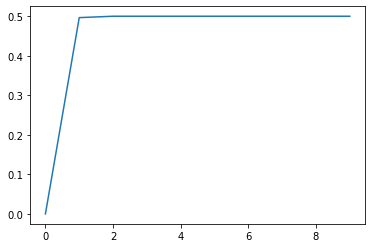

Training accuracy  0.5001666666666666
Train TSNE scatter


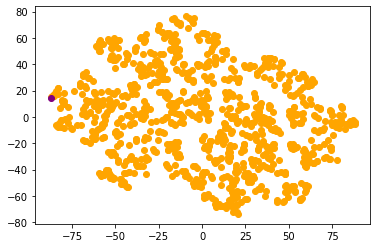

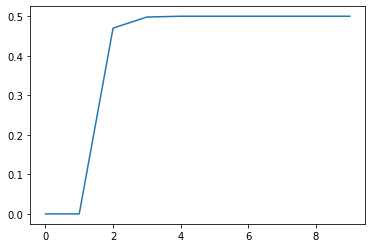

Valudation accuracy  0.5
Validation TSNE scatter


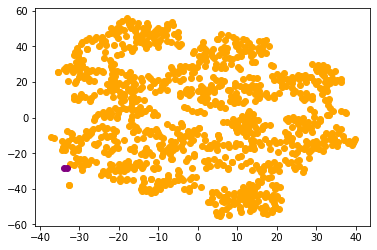

In [13]:
#DBSCAN + autoencoder
hyperp = DBSCAN_tune(X_train_enc,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_enc)
print('Training accuracy ', accuracy(trainDBSCAN, y_train))
print('Train TSNE scatter')
print_points(trainDBSCAN, X_train_enc)

hyperp = DBSCAN_tune(X_valid_enc,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_enc)
print('Valudation accuracy ',accuracy(predictionsDBSCAN, y_valid))
print('Validation TSNE scatter')
print_points(predictionsDBSCAN, X_valid_enc)

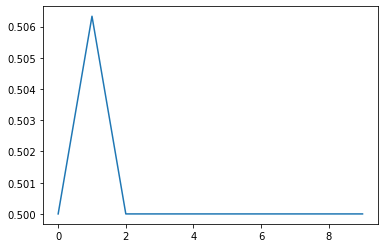

Silhouette Coefficient: 0.392
Training accuracy  0.5063333333333333
Train TSNE scatter


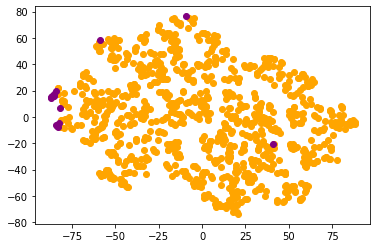

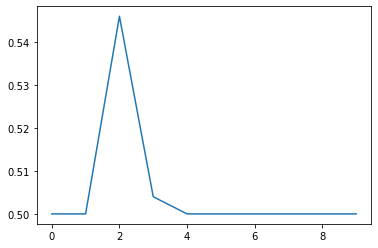

Silhouette Coefficient: -0.078
Valudation accuracy  0.589
Validation TSNE scatter


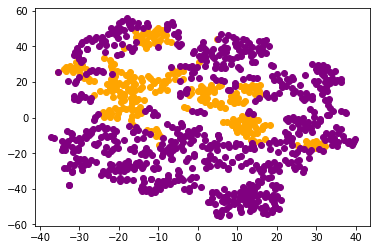

In [14]:
#DBSCAN + autoencoder + turning -1 into 1
hyperp = DBSCAN_tune_ones(X_train_enc,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc, make_ones(trainDBSCAN)))
print('Training accuracy ', accuracy(make_ones(trainDBSCAN), y_train))
print('Train TSNE scatter')
print_points(make_ones(trainDBSCAN), X_train_enc)

hyperp = DBSCAN_tune_ones(X_valid_enc,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc, make_ones(predictionsDBSCAN)))
print('Valudation accuracy ',accuracy(make_ones(predictionsDBSCAN), y_valid))
print('Validation TSNE scatter')
print_points(make_ones(predictionsDBSCAN), X_valid_enc)

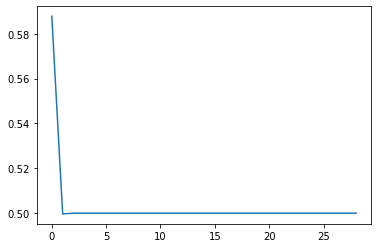

Silhouette Coefficient: -0.012
Training accuracy  0.8405
Train TSNE scatter


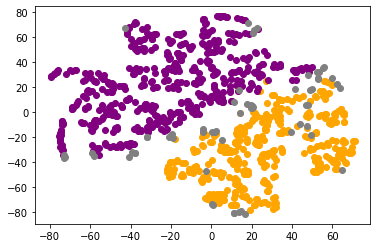

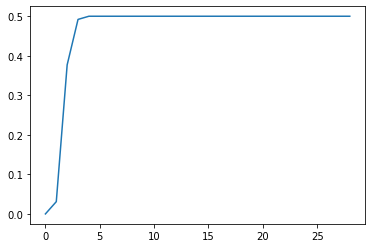

Valudation accuracy  0.501
Silhouette Coefficient: -0.054
Validation TSNE scatter


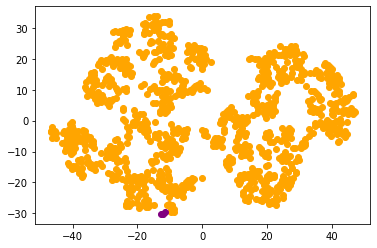

In [15]:
#DBSCAN + autoencoder + normalization

hyperp = DBSCAN_tune_norm(X_train_enc_norm,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc_norm, trainDBSCAN))
print('Training accuracy ', accuracy(trainDBSCAN, y_train))
print('Train TSNE scatter')
print_points(trainDBSCAN, X_train_enc_norm)


hyperp = DBSCAN_tune_norm(X_valid_enc_norm,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_enc_norm)
print('Valudation accuracy ',accuracy(predictionsDBSCAN, y_valid))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc_norm, predictionsDBSCAN))
print('Validation TSNE scatter')
print_points(predictionsDBSCAN, X_valid_enc_norm)

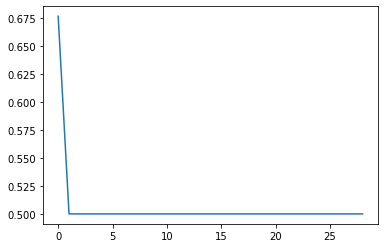

Silhouette Coefficient: -0.036
Training accuracy  0.8641666666666666
Train TSNE scatter


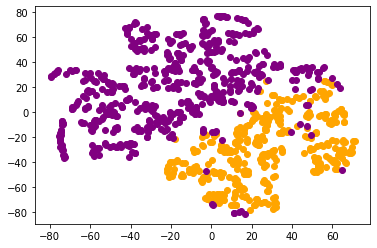

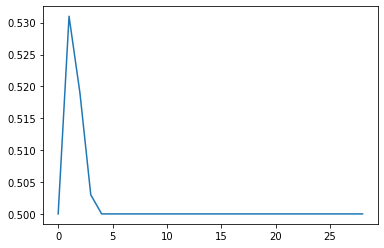

Silhouette Coefficient: 0.056
Valudation accuracy  0.588
Validation TSNE scatter


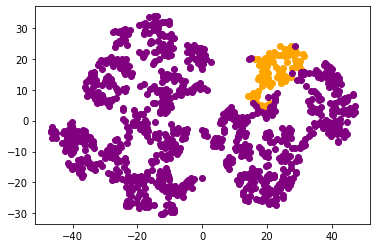

In [16]:
#DBSCAN + autoencoder + normalization + turning -1 into 1

hyperp = DBSCAN_tune_ones_norm(X_train_enc_norm,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc_norm, make_ones(trainDBSCAN)))
print('Training accuracy ', accuracy(make_ones(trainDBSCAN), y_train))
print('Train TSNE scatter')
print_points(make_ones(trainDBSCAN), X_train_enc_norm)


hyperp = DBSCAN_tune_ones_norm(X_valid_enc_norm,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc_norm, make_ones(predictionsDBSCAN)))
print('Valudation accuracy ',accuracy(make_ones(predictionsDBSCAN), y_valid))
print('Validation TSNE scatter')
print_points(make_ones(predictionsDBSCAN), X_valid_enc_norm)

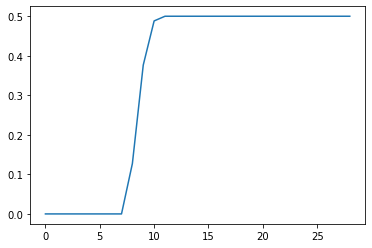

Training accuracy  0.5
Train TSNE scatter


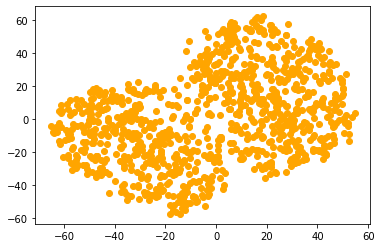

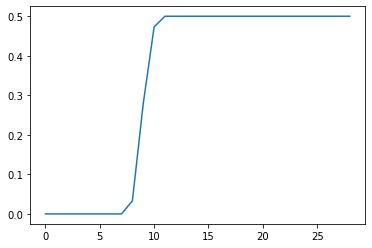

Valudation accuracy  0.5
Validation TSNE scatter


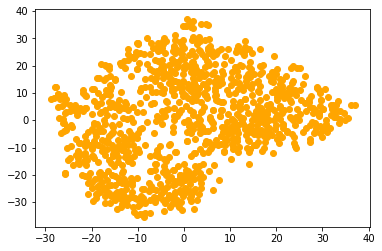

In [17]:
#DBSCAN + normalization

hyperp = DBSCAN_tune_norm(X_train_norm,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_norm)
print('Training accuracy ', accuracy(trainDBSCAN, y_train))
print('Train TSNE scatter')
print_points(trainDBSCAN, X_train_norm)


hyperp = DBSCAN_tune_norm(X_valid_norm,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_norm)
print('Valudation accuracy ',accuracy(predictionsDBSCAN, y_valid))
print('Validation TSNE scatter')
print_points(predictionsDBSCAN, X_valid_norm)

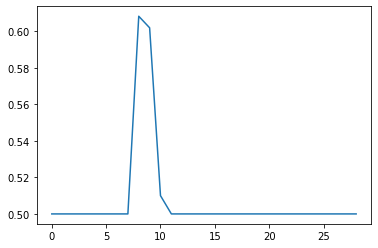

Silhouette Coefficient: -0.008
Training accuracy  0.6143333333333333
Train TSNE scatter


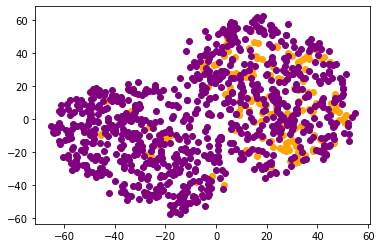

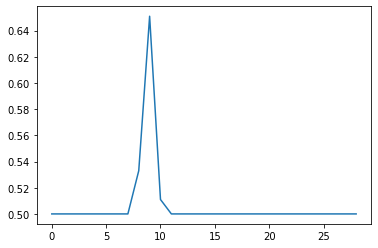

Silhouette Coefficient: 0.015
Valudation accuracy  0.652
Validation TSNE scatter


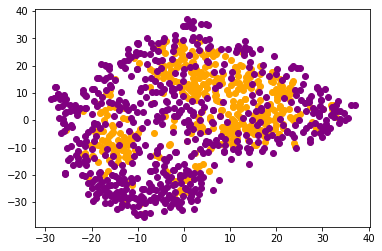

In [18]:
#DBSCAN + normalization + turning -1 into 1

hyperp = DBSCAN_tune_ones_norm(X_train_norm,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_norm, make_ones(trainDBSCAN)))
print('Training accuracy ', accuracy(make_ones(trainDBSCAN), y_train))
print('Train TSNE scatter')
print_points(make_ones(trainDBSCAN), X_train_norm)


hyperp = DBSCAN_tune_ones_norm(X_valid_norm,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_norm, make_ones(predictionsDBSCAN)))
print('Valudation accuracy ',accuracy(make_ones(predictionsDBSCAN), y_valid))
print('Validation TSNE scatter')
print_points(make_ones(predictionsDBSCAN), X_valid_norm)

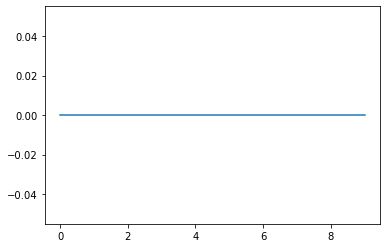

Training accuracy  0.0003333333333333333
Train TSNE scatter


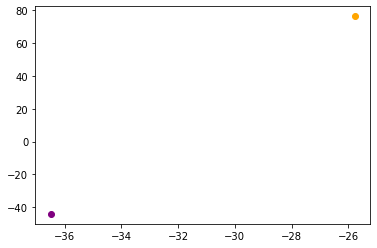

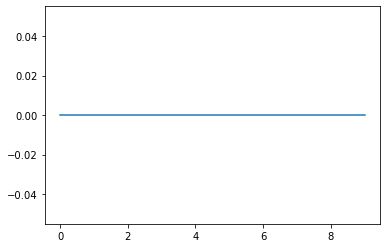

Valudation accuracy  0.001
Validation TSNE scatter


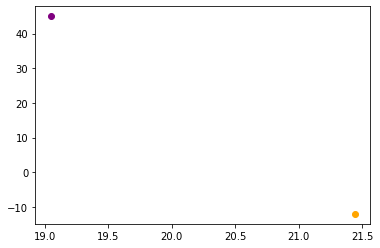

In [19]:
#DBSCAN 
hyperp = DBSCAN_tune(X_train,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train)
print('Training accuracy ', accuracy(trainDBSCAN, y_train))
print('Train TSNE scatter')
print_points(trainDBSCAN, X_train)

hyperp = DBSCAN_tune(X_valid,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid)
print('Valudation accuracy ',accuracy(predictionsDBSCAN, y_valid))
print('Validation TSNE scatter')
print_points(predictionsDBSCAN, X_valid)

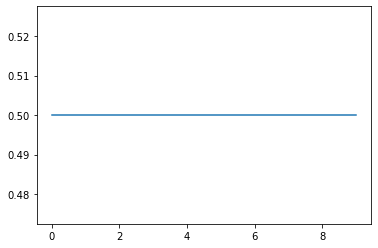

Training accuracy  0.5
Train TSNE scatter


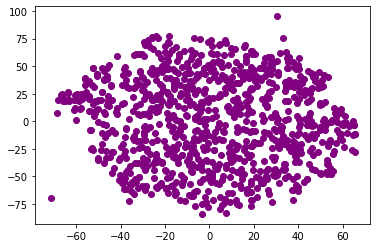

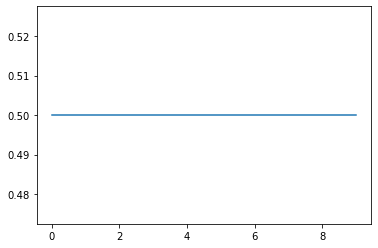

Valudation accuracy  0.5
Validation TSNE scatter


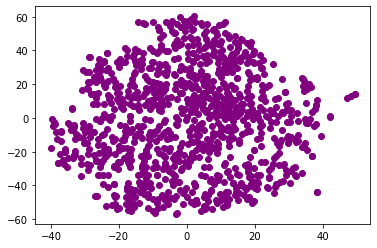

In [20]:
#DBSCAN + turning -1 into 1
hyperp = DBSCAN_tune_ones(X_train,y_train)
dbscan = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
trainDBSCAN = dbscan.fit_predict(X_train)
print('Training accuracy ', accuracy(make_ones(trainDBSCAN), y_train))
print('Train TSNE scatter')
print_points(make_ones(trainDBSCAN), X_train)

hyperp = DBSCAN_tune_ones(X_valid,y_valid)
dbscan2 = DBSCAN(eps=hyperp[1], min_samples=hyperp[2])
predictionsDBSCAN = dbscan2.fit_predict(X_valid)
print('Valudation accuracy ',accuracy(make_ones(predictionsDBSCAN), y_valid))
print('Validation TSNE scatter')
print_points(make_ones(predictionsDBSCAN), X_valid)

Silhouette Coefficient: 0.033
Training accuracy  0.825
Train TSNE scatter


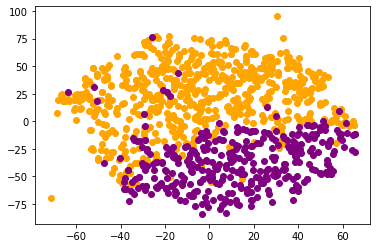

Silhouette Coefficient: 0.038
Validation accuracy  0.707
Validation TSNE scatter


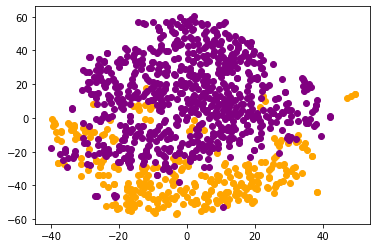

In [24]:
#AgglomerativeClustering 

agg = AgglomerativeClustering()
train_agg = AgglomerativeClustering().fit_predict(X_train)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, train_agg))
print('Training accuracy ', accuracy(train_agg, y_train))
print('Train TSNE scatter')
print_points(train_agg, X_train)

pred_agg = AgglomerativeClustering().fit_predict(X_valid)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid, pred_agg))
print('Validation accuracy ', accuracy(pred_agg, y_valid))
print('Validation TSNE scatter')
print_points(pred_agg, X_valid)

Silhouette Coefficient: 0.021
Training accuracy  0.6456666666666667
Train TSNE scatter


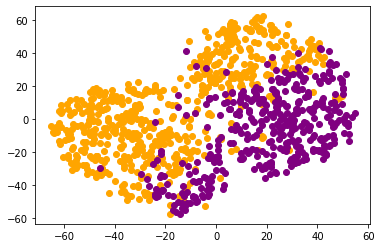

Silhouette Coefficient: 0.024
Validation accuracy  0.545
Validation TSNE scatter


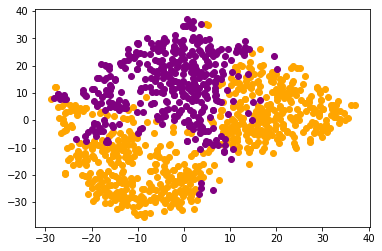

In [25]:
#AgglomerativeClustering + normalization
agg = AgglomerativeClustering()
train_agg = AgglomerativeClustering().fit_predict(X_train_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_norm, train_agg))
print('Training accuracy ', accuracy(train_agg, y_train))
print('Train TSNE scatter')
print_points(train_agg, X_train_norm)

pred_agg = AgglomerativeClustering().fit_predict(X_valid_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_norm, pred_agg))
print('Validation accuracy ', accuracy(pred_agg, y_valid))
print('Validation TSNE scatter')
print_points(pred_agg, X_valid_norm)

Silhouette Coefficient: 0.280
Training accuracy  0.829
Train TSNE scatter


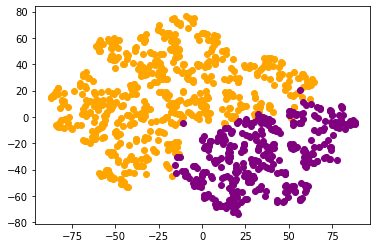

Silhouette Coefficient: 0.209
Validation accuracy  0.806
Validation TSNE scatter


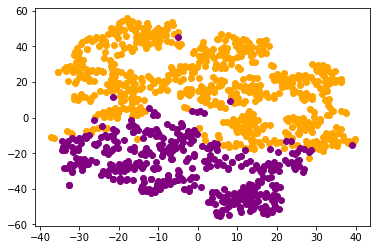

In [26]:
#AgglomerativeClustering + autoencoder
agg = AgglomerativeClustering()
train_agg = AgglomerativeClustering().fit_predict(X_train_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc, train_agg))
print('Training accuracy ', accuracy(train_agg, y_train))
print('Train TSNE scatter')
print_points(train_agg, X_train_enc)

pred_agg = AgglomerativeClustering().fit_predict(X_valid_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc, pred_agg))
print('Validation accuracy ', accuracy(pred_agg, y_valid))
print('Validation TSNE scatter')
print_points(pred_agg, X_valid_enc)

Silhouette Coefficient: 0.309
Training accuracy  0.7933333333333333
Train TSNE scatter


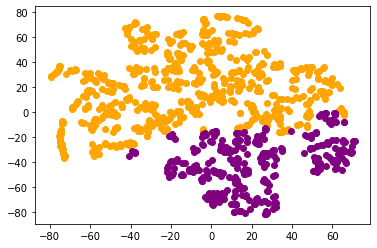

Silhouette Coefficient: 0.206
Validation accuracy  0.827
Validation TSNE scatter


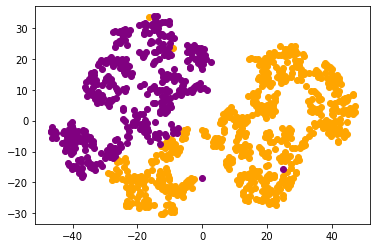

In [27]:
#AgglomerativeClustering + autoencoder + normalization
agg = AgglomerativeClustering()
train_agg = AgglomerativeClustering().fit_predict(X_train_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc_norm, train_agg))
print('Training accuracy ', accuracy(train_agg, y_train))
print('Train TSNE scatter')
print_points(train_agg, X_train_enc_norm)

pred_agg = AgglomerativeClustering().fit_predict(X_valid_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc_norm, pred_agg))
print('Validation accuracy ', accuracy(pred_agg, y_valid))
print('Validation TSNE scatter')
print_points(pred_agg, X_valid_enc_norm)

In [28]:
model_original = Sequential()
model_original.add(Dense(5000,input_dim=5000,activation='relu'))
model_original.add(Dense(2,activation='softmax'))

model_original.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model_original.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10002     
Total params: 25,015,002
Trainable params: 25,015,002
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_enc = Sequential()
model_enc.add(Dense(100,input_dim=100,activation='relu'))
model_enc.add(Dense(2,activation='softmax'))

model_enc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model_enc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 202       
Total params: 10,302
Trainable params: 10,302
Non-trainable params: 0
_________________________________________________________________


validation accuracy 0.9810
train accuracy 0.9975


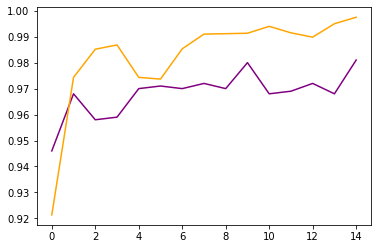

validation loss 5.2010
train loss 0.3325


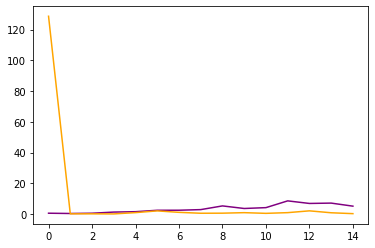

Training data using TSNE


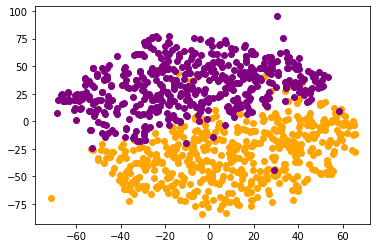

Silhouette Coefficient: 0.020
Predictions using TSNE


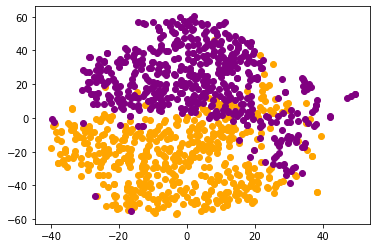

Silhouette Coefficient: 0.020


In [30]:
#MLP
plotting = model_original.fit(X_train,y_train,validation_data=(X_valid,y_valid), epochs=15, verbose=False)
print('validation accuracy %.4f'%plotting.history.get('val_accuracy')[-1])
print('train accuracy %.4f'%plotting.history.get('accuracy')[-1])
plt.plot(plotting.history['val_accuracy'],color='purple')
plt.plot(plotting.history['accuracy'],color='orange')
plt.show()

print('validation loss %.4f'%plotting.history.get('val_loss')[-1])
print('train loss %.4f'%plotting.history.get('loss')[-1])
plt.plot(plotting.history['val_loss'],color='purple')
plt.plot(plotting.history['loss'],color='orange')
plt.show()

trainMLP = np.argmax(model_original.predict(X_train),axis=1)
print('Training data using TSNE')
print_points(trainMLP, X_train)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train, trainMLP))

predictionsMLP = np.argmax(model_original.predict(X_valid),axis=1)
print('Predictions using TSNE')
print_points(predictionsMLP, X_valid)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid, predictionsMLP))

validation accuracy 0.9790
train accuracy 0.9998


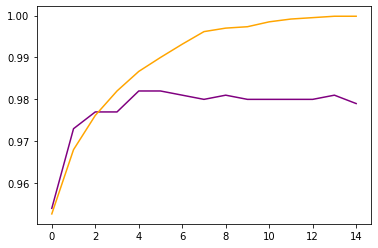

validation loss 0.0512
train loss 0.0071


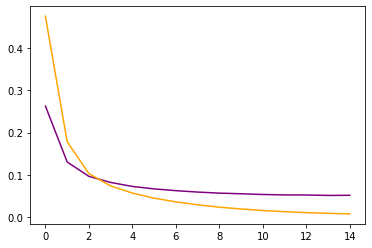

Training data using TSNE


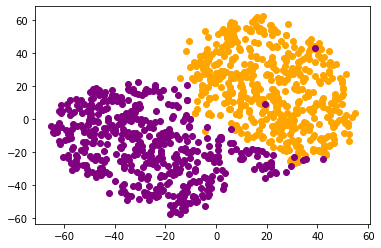

Silhouette Coefficient: 0.019
Predictions using TSNE


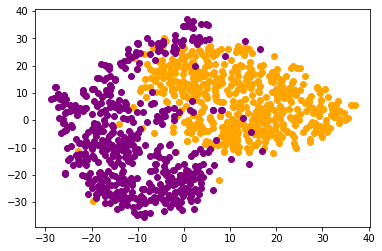

Silhouette Coefficient: 0.020


In [31]:
#MLP + normalization
plotting = model_original.fit(X_train_norm,y_train,validation_data=(X_valid_norm,y_valid), epochs=15, verbose=False)
print('validation accuracy %.4f'%plotting.history.get('val_accuracy')[-1])
print('train accuracy %.4f'%plotting.history.get('accuracy')[-1])
plt.plot(plotting.history['val_accuracy'],color='purple')
plt.plot(plotting.history['accuracy'],color='orange')
plt.show()

print('validation loss %.4f'%plotting.history.get('val_loss')[-1])
print('train loss %.4f'%plotting.history.get('loss')[-1])
plt.plot(plotting.history['val_loss'],color='purple')
plt.plot(plotting.history['loss'],color='orange')
plt.show()

trainMLP = np.argmax(model_original.predict(X_train_norm),axis=1)
print('Training data using TSNE')
print_points(trainMLP, X_train_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_norm, trainMLP))

predictionsMLP = np.argmax(model_original.predict(X_valid_norm),axis=1)
print('Predictions using TSNE')
print_points(predictionsMLP, X_valid_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_norm, predictionsMLP))

validation accuracy 0.5960
train accuracy 0.8673


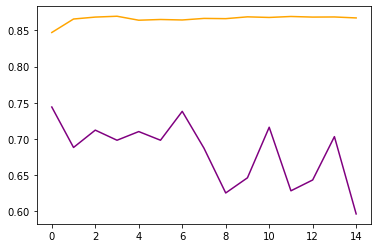

validation loss 28.2376
train loss 2.7199


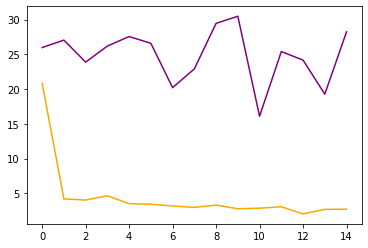

Training data using TSNE


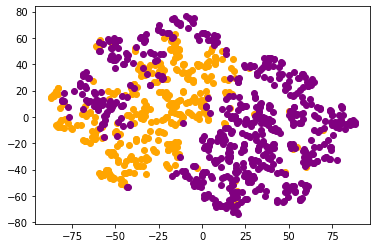

Silhouette Coefficient: 0.113
Predictions using TSNE


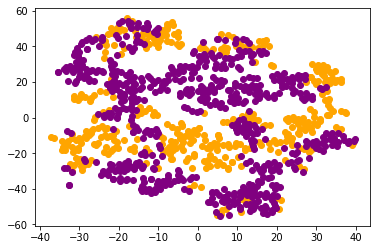

Silhouette Coefficient: 0.084


In [32]:
#MLP + autoencoder
plotting = model_enc.fit(X_train_enc,y_train,validation_data=(X_valid_enc,y_valid), epochs=15, verbose=False)
print('validation accuracy %.4f'%plotting.history.get('val_accuracy')[-1])
print('train accuracy %.4f'%plotting.history.get('accuracy')[-1])
plt.plot(plotting.history['val_accuracy'],color='purple')
plt.plot(plotting.history['accuracy'],color='orange')
plt.show()

print('validation loss %.4f'%plotting.history.get('val_loss')[-1])
print('train loss %.4f'%plotting.history.get('loss')[-1])
plt.plot(plotting.history['val_loss'],color='purple')
plt.plot(plotting.history['loss'],color='orange')
plt.show()

trainMLP = np.argmax(model_enc.predict(X_train_enc),axis=1)
print('Training data using TSNE')
print_points(trainMLP, X_train_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc, trainMLP))

predictionsMLP = np.argmax(model_enc.predict(X_valid_enc),axis=1)
print('Predictions using TSNE')
print_points(predictionsMLP, X_valid_enc)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc, predictionsMLP))

validation accuracy 0.8490
train accuracy 0.8903


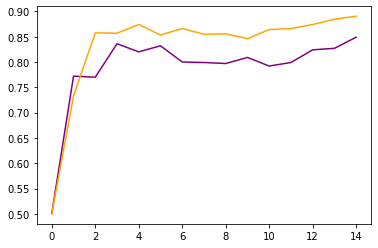

validation loss 0.4665
train loss 0.4475


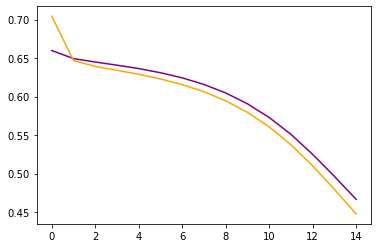

Training data using TSNE


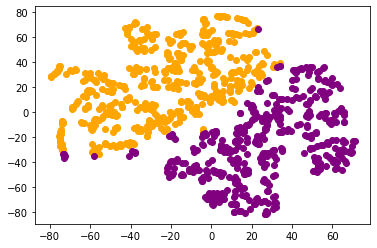

Silhouette Coefficient: 0.361
Predictions using TSNE


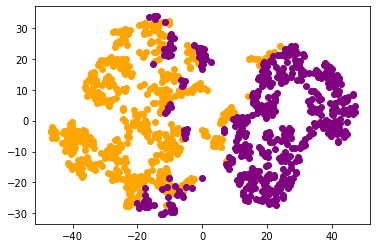

Silhouette Coefficient: 0.230


In [33]:
#MLP + autoencoder + normalization
plotting = model_enc.fit(X_train_enc_norm,y_train,validation_data=(X_valid_enc_norm,y_valid), epochs=15, verbose=False)
print('validation accuracy %.4f'%plotting.history.get('val_accuracy')[-1])
print('train accuracy %.4f'%plotting.history.get('accuracy')[-1])
plt.plot(plotting.history['val_accuracy'],color='purple')
plt.plot(plotting.history['accuracy'],color='orange')
plt.show()

print('validation loss %.4f'%plotting.history.get('val_loss')[-1])
print('train loss %.4f'%plotting.history.get('loss')[-1])
plt.plot(plotting.history['val_loss'],color='purple')
plt.plot(plotting.history['loss'],color='orange')
plt.show()

trainMLP = np.argmax(model_enc.predict(X_train_enc_norm),axis=1)
print('Training data using TSNE')
print_points(trainMLP, X_train_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_train_enc_norm, trainMLP))

predictionsMLP = np.argmax(model_enc.predict(X_valid_enc_norm),axis=1)
print('Predictions using TSNE')
print_points(predictionsMLP, X_valid_enc_norm)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_valid_enc_norm, predictionsMLP))